In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

# fractal

> Fill in a module description here

In [ ]:
#| default_exp fractal

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from abc import abstractmethod
import numpy as np
from fractalart.core import Image
from numba import njit, prange
import math
import matplotlib.pyplot as plt

In [ ]:
#| export
class Fractal(Image):
    """Abstract base class for generating fractal images."""

    def __init__(
        self,
        width: int = 800,
        height: int = 800,
        x_min: float = -2.0,
        x_max: float = 1.0,
        y_min: float = -1.5,
        y_max: float = 1.5,
        max_iter: int = 1000,
    ):
        """Initialize the fractal with image resolution and complex plane bounds."""
        super().__init__(width, height)
        self._x_min, self._x_max = x_min, x_max
        self._y_min, self._y_max = y_min, y_max
        self.max_iter = max_iter  # Uses property setter for validation

    @abstractmethod
    def compute(self) -> np.ndarray:
        """Abstract method to compute the fractal array. Must be implemented by subclasses."""
        pass

    @property
    def max_iter(self) -> int:
        """Maximum number of iterations used in fractal computation."""
        return self._max_iter

    @max_iter.setter
    def max_iter(self, value: int):
        if value <= 0:
            raise ValueError("max_iter must be a positive integer.")
        self._max_iter = value

    def plot(self, cmap: str = "turbo"):
        """Display the rendered fractal image using matplotlib."""
        plt.figure(figsize=(10, 10))
        plt.imshow(
            self._image,
            cmap=cmap,
            extent=[self._x_min, self._x_max, self._y_min, self._y_max],
            origin='lower'
        )
        plt.axis('off')
        plt.show()

    def set_zoom(self, zoom: float, center: tuple[float, float]):
        """
        Zoom into the fractal at a specific center.

        Args:
            zoom: Zoom factor (higher is closer).
            center: (x, y) center coordinates in the complex plane.
        """
        if zoom <= 0:
            raise ValueError("zoom must be a positive number.")
        delta = 2 / zoom
        cx, cy = center
        self._x_min, self._x_max = cx - delta, cx + delta
        self._y_min, self._y_max = cy - delta, cy + delta

    def _render(self):
        """Generate and store the fractal image using the subclass-defined `compute` method."""
        self._image = self.compute()

In [ ]:
#| export
@njit(parallel=True, fastmath=True)
def compute_mandelbrot(x_min: float, x_max: float, y_min: float, y_max: float, width: int, height: int, max_iter: int) -> np.ndarray:
    # Allocate with float32 to halve memory bandwidth (optional)
    result = np.zeros((height, width), dtype=np.float32)

    dx = (x_max - x_min) / width
    dy = (y_max - y_min) / height

    inv_log2 = 1.0 / math.log(2.0)   # for nu calculation
    log2_const = math.log(2.0)

    for j in prange(height):
        zy = y_min + j * dy
        for i in range(width):
            zx = x_min + i * dx
            zr = 0.0
            zi = 0.0
            cr = zx
            ci = zy
            iteration = 0

            # Mandelbrot iteration
            while zr * zr + zi * zi <= 4.0 and iteration < max_iter:
                # (zr + i zi)^2 + c
                zr2 = zr * zr - zi * zi + cr
                zi = 2.0 * zr * zi + ci
                zr = zr2
                iteration += 1

            if iteration < max_iter:
                # smooth coloring
                mag_sq = zr * zr + zi * zi
                log_zn = 0.5 * math.log(mag_sq)
                nu = math.log(log_zn * inv_log2) * inv_log2
                result[j, i] = iteration + 1 - nu
            else:
                result[j, i] = iteration

    return result


class Mandelbrot(Fractal):
    def compute(self) -> np.ndarray:
        w, h = self.resolution
        # pass resolution-consistent dims
        return compute_mandelbrot(self._x_min, self._x_max, self._y_min, self._y_max, w, h, self._max_iter)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


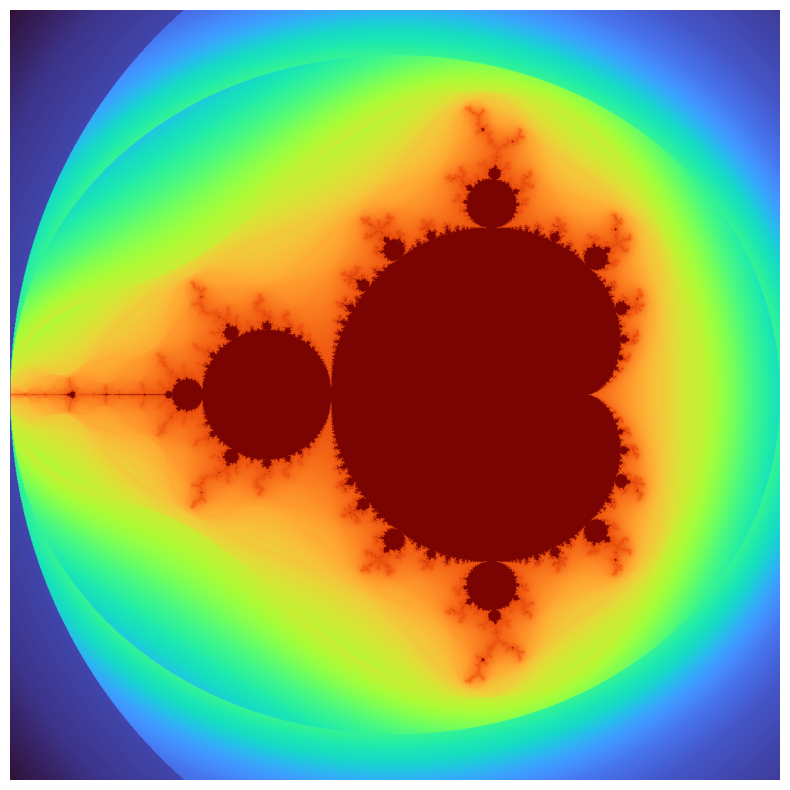

In [ ]:
m = Mandelbrot()
m.resolution = 1200, 1200
m.max_iter = 100
m.render()
m.equalize_histogram()
m.plot()

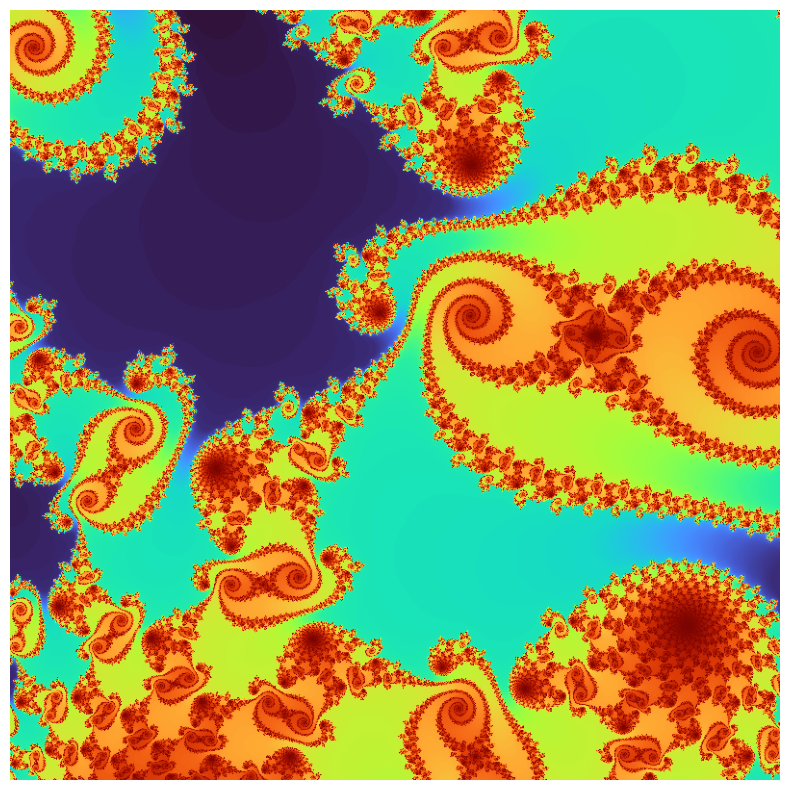

In [ ]:
m = Mandelbrot()
m.resolution = 800, 800
m.max_iter = 10000

#m.set_zoom(5, (-0.170337,-1.06506))
#m.set_zoom(25, (-0.170337,-1.06506))
#m.set_zoom(125, (-0.170337,-1.06506))
#m.set_zoom(625, (-0.170337,-1.06506))
#m.set_zoom(3125, (-0.170337,-1.06506))
#m.set_zoom(15625, (-0.170337,-1.06506))
#m.set_zoom(78125, (-0.170337,-1.06506))

#m.set_zoom(5, (0.42884,-0.231345))
#m.set_zoom(25, (0.42884,-0.231345))
#m.set_zoom(125, (0.42884,-0.231345))
#m.set_zoom(625, (0.42884,-0.231345))
#m.set_zoom(3125, (0.42884,-0.231345))
#m.set_zoom(15625, (0.42884,-0.231345))
#m.set_zoom(78125, (0.42884,-0.231345))

#m.set_zoom(5, (-1.62917,-0.0203968))
#m.set_zoom(25, (-1.62917,-0.0203968))
#m.set_zoom(125, (-1.62917,-0.0203968))
#m.set_zoom(625, (-1.62917,-0.0203968))
#m.set_zoom(3125, (-1.62917,-0.0203968))
#m.set_zoom(15625, (-1.62917,-0.0203968))
#m.set_zoom(78125, (-1.62917,-0.0203968))

#m.set_zoom(5, (-0.761574,-0.0847596))
#m.set_zoom(25, (-0.761574,-0.0847596))
#m.set_zoom(125, (-0.761574,-0.0847596))
#m.set_zoom(625, (-0.761574,-0.0847596))
#m.set_zoom(3125, (-0.761574,-0.0847596))
#m.set_zoom(15625, (-0.761574,-0.0847596))
m.set_zoom(78125, (-0.761574,-0.0847596))

m.render()
m.equalize_histogram()
m.plot()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()